<a href="https://colab.research.google.com/github/arthruur/Projetos-IA/blob/main/GraficosDerivadasParciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Derivadas parciais

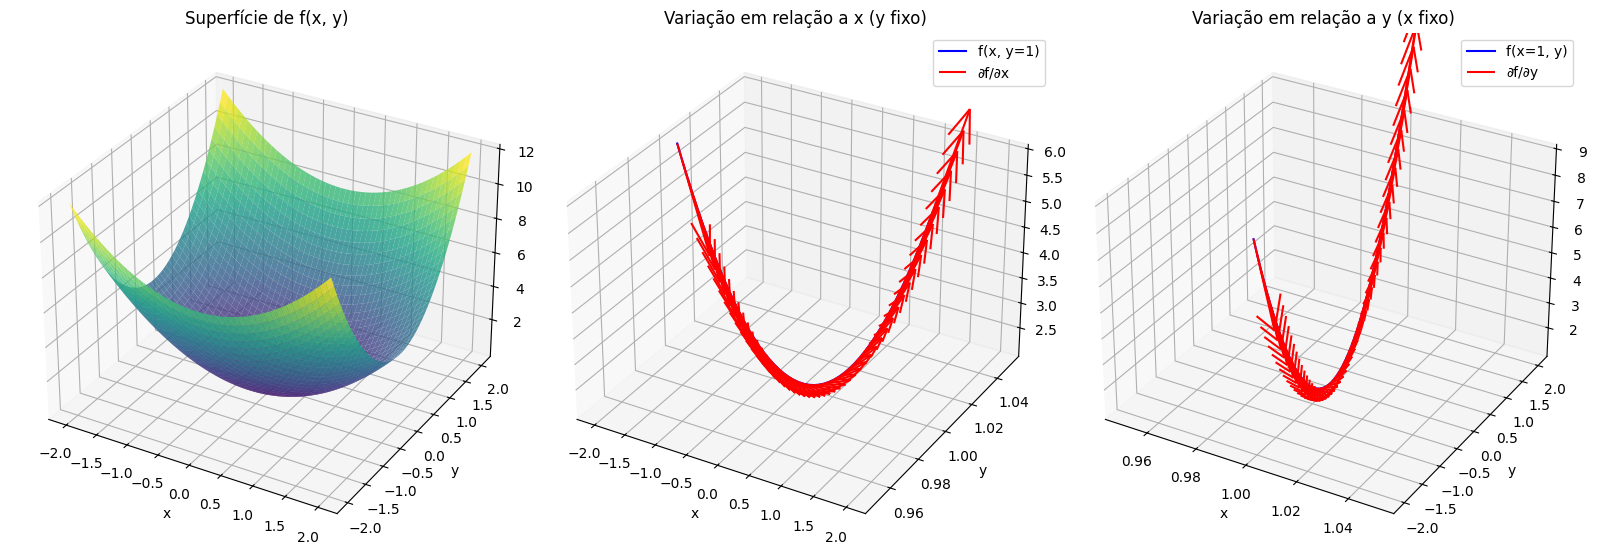

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Função assimétrica
def f(x, y):
    return x**2 + 2 * y**2

# Derivadas parciais
def df_dx(x, y):
    return 2 * x

def df_dy(x, y):
    return 4 * y

# Grid para 3D
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Ponto fixo para visualização
fixed_y = 1  # Fixar y para ∂f/∂x
fixed_x = 1  # Fixar x para ∂f/∂y

# Valores para cortes
Z_dx = f(x, fixed_y)
dZ_dx = df_dx(x, fixed_y)

Z_dy = f(fixed_x, y)
dZ_dy = df_dy(fixed_x, y)

# Plot 3D: f(x, y)
fig = plt.figure(figsize=(16, 8))

# Gráfico 3D completo
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Superfície de f(x, y)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# Gráfico 3D: Variação em relação a x (fixando y)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(x, fixed_y * np.ones_like(x), Z_dx, label="f(x, y=1)", color="blue")
ax2.quiver(x, fixed_y * np.ones_like(x), Z_dx,
           1, 0, dZ_dx, color="red", length=0.5, label="∂f/∂x")
ax2.set_title("Variação em relação a x (y fixo)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.legend()

# Gráfico 3D: Variação em relação a y (fixando x)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(fixed_x * np.ones_like(y), y, Z_dy, label="f(x=1, y)", color="blue")
ax3.quiver(fixed_x * np.ones_like(y), y, Z_dy,
           0, 1, dZ_dy, color="red", length=0.5, label="∂f/∂y")
ax3.set_title("Variação em relação a y (x fixo)")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
ax3.legend()

plt.tight_layout()
plt.show()


## Vetor Gradiente

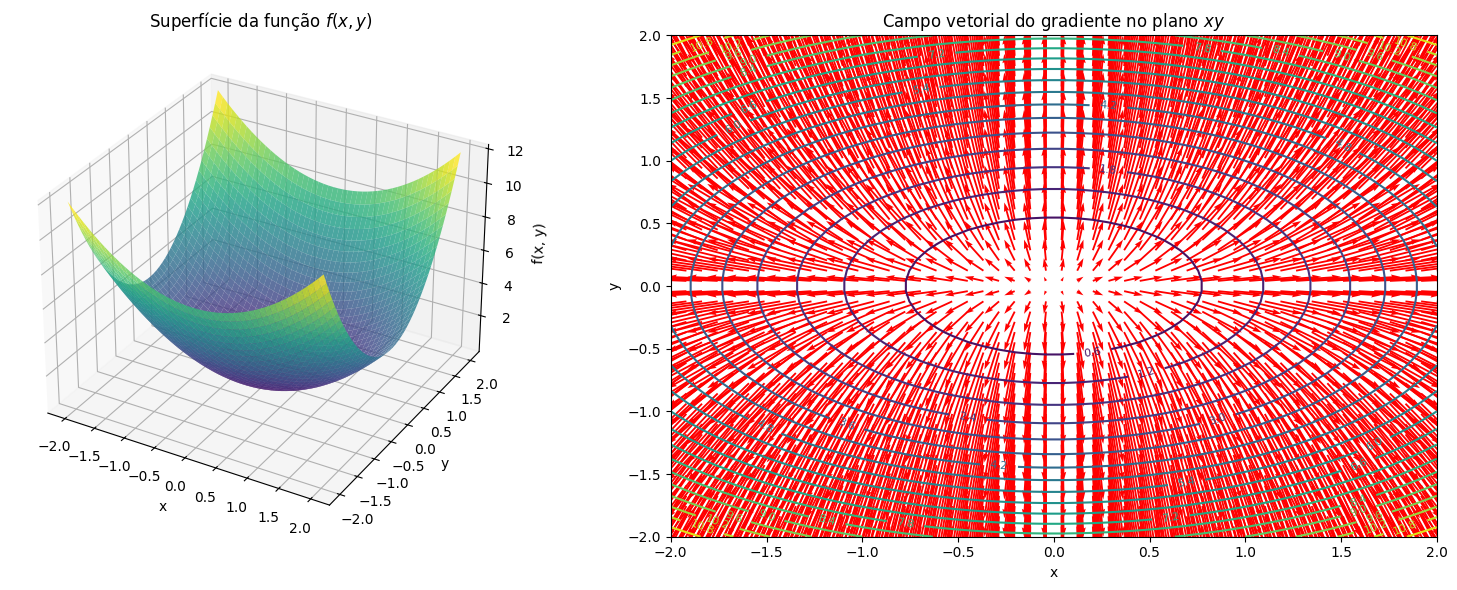

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Função assimétrica
def f(x, y):
    return x**2 + 2 * y**2

# Gradiente (∂f/∂x, ∂f/∂y)
def gradient(x, y):
    return 2 * x, 4 * y

# Grid para 3D
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Gradiente em cada ponto da grade
U, V = gradient(X, Y)  # Componentes do vetor gradiente

# Gráfico 1: Superfície 3D
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Superfície da função $f(x, y)$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("f(x, y)")

# Gráfico 2: Campo vetorial 2D
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.quiver(X, Y, U, V, color='red', scale=30)
ax2.set_title("Campo vetorial do gradiente no plano $xy$")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.clabel(contour, inline=True, fontsize=8)

plt.tight_layout()
plt.show()



## Derivada direcional

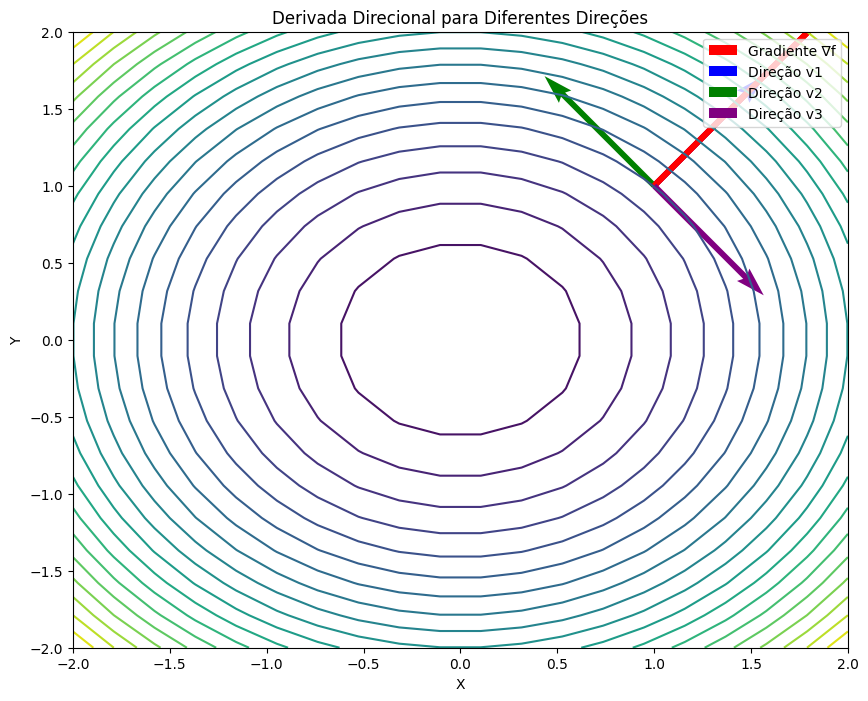

Derivada Direcional na direção v1: 2.82842712474619
Derivada Direcional na direção v2: 0.0
Derivada Direcional na direção v3: 0.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Função z = f(x, y)
def f(x, y):
    return x**2 + y**2

# Ponto de interesse
point = np.array([1, 1])

# Gradiente no ponto
grad = np.array([2*point[0], 2*point[1]])  # Gradiente de f(x, y) = x^2 + y^2

# Direções para derivadas direcionais
directions = [
    np.array([1, 1]) / np.sqrt(2),  # Direção -1 (paralela ao gradiente)
    np.array([-1, 1]) / np.sqrt(2),  # Direção 2 (perpendicular ao gradiente)
    np.array([1, -1]) / np.sqrt(2)   # Direção 3 (arbitrária)
]

# Cálculo das derivadas direcionais
derivatives = [np.dot(grad, v) for v in directions]

# Plot
plt.figure(figsize=(10, 8))
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot das curvas de nível
plt.contour(X, Y, Z, levels=20, cmap='viridis')

# Plot dos vetores gradiente e direções
for i, direction in enumerate(directions):
    plt.quiver(point[0], point[1], grad[0], grad[1], color="red", scale=5, label="Gradiente ∇f" if i == 0 else "")
    plt.quiver(point[0], point[1], direction[0], direction[1], color=["blue", "green", "purple"][i], scale=5, label=f"Direção v{i+1}")

# Títulos e legendas
plt.title("Derivada Direcional para Diferentes Direções")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Exibir os resultados das derivadas direcionais
for i, deriv in enumerate(derivatives):
    print(f"Derivada Direcional na direção v{i+1}: {deriv}")


## Gradiente descendente e Regressão linear

<ipython-input-17-eb6a7ad455c9>:8: RuntimeWarning: overflow encountered in square
  return (1 / (2 * m)) * np.sum((predictions - y) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


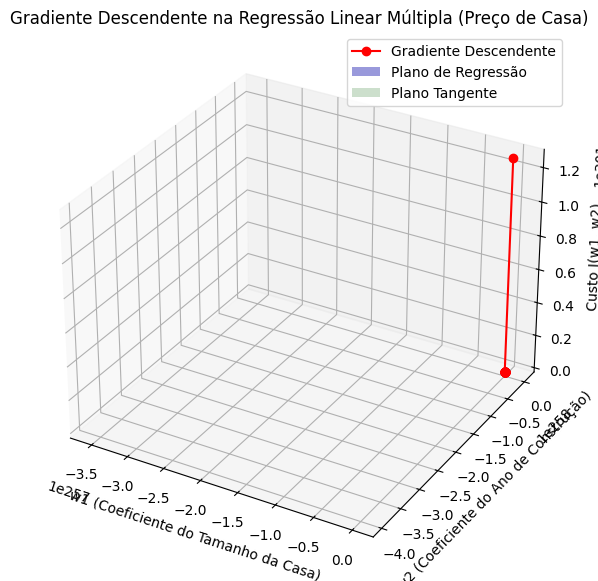

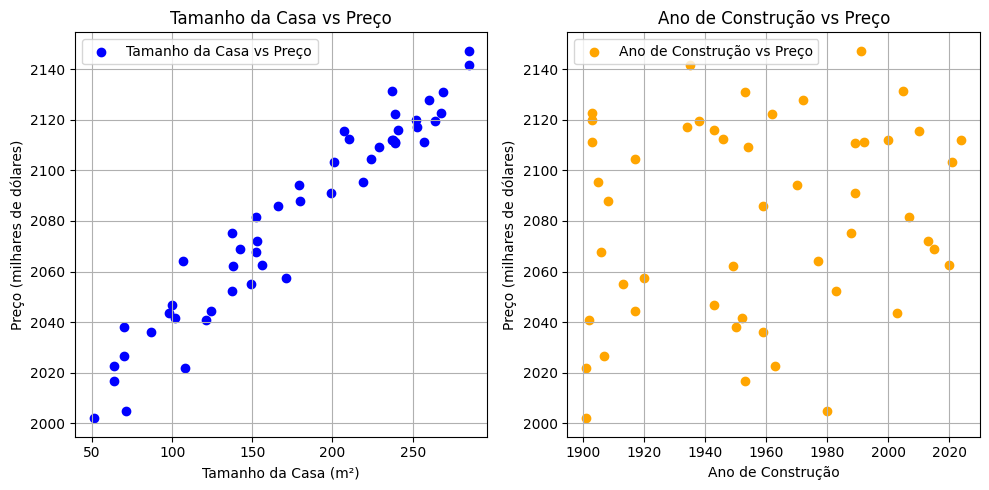

Iteração 1: w1 = 0.00, w2 = 0.00, Custo = 2166385.70
Iteração 2: w1 = 36.89, w2 = 407.30, Custo = 321323643400.70
Iteração 3: w1 = -14094.78, w2 = -156502.92, Custo = 47683387815301192.00
Iteração 4: w1 = 5429789.90, w2 = 60288921.26, Custo = 7076060297005616857088.00
Iteração 5: w1 = -2091679782.96, w2 = -23224678807.69, Custo = 1050064427490363055301197824.00
Iteração 6: w1 = 805763164201.39, w2 = 8946680477817.37, Custo = 155826159698957600698343406698496.00
Iteração 7: w1 = -310398504551018.06, w2 = -3446467106453203.50, Custo = 23124097351395978464685511691420565504.00
Iteração 8: w1 = 119572643560917184.00, w2 = 1327658403059797504.00, Custo = 3431541143989413634750376278018995479642112.00
Iteração 9: w1 = -46062132640835985408.00, w2 = -511444554893570801664.00, Custo = 509229590411722736917771449320972140010560028672.00
Iteração 10: w1 = 17744192987930738819072.00, w2 = 197020206498479463202816.00, Custo = 75568021734228399078255041765014645876437606568296448.00
Iteração 11: w1

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Função de custo para regressão linear múltipla
def cost_function(w0, w1, w2, X1, X2, y):
    m = len(y)
    predictions = w0 + w1 * X1 + w2 * X2
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gerando 50 exemplos fictícios
np.random.seed(42)
X1 = np.random.randint(50, 300, 50)  # Tamanho em metros quadrados (50 a 300 m²)
X2 = np.random.randint(1900, 2025, 50)  # Ano de construção (1900 a 2025)
y = 0.5 * X1 + 2000 - 0.1 * (2025 - X2) + np.random.normal(0, 10, 50)  # Preço com um pouco de ruído

# Superfície de custo com dois parâmetros (w1, w2)
W1, W2 = np.meshgrid(np.linspace(-100, 300, 50), np.linspace(-100, 300, 50))
J = np.array([[cost_function(0, w1, w2, X1, X2, y) for w1, w2 in zip(w1_row, w2_row)] for w1_row, w2_row in zip(W1, W2)])

# Caminho do gradiente descendente
w0, w1, w2 = 0, 0, 0  # Inicialização
alpha = 0.0001  # Taxa de aprendizado
iterations = 100
path = [(w1, w2)]
for _ in range(iterations):
    grad_w0 = np.mean(w0 + w1 * X1 + w2 * X2 - y)
    grad_w1 = np.mean((w0 + w1 * X1 + w2 * X2 - y) * X1)
    grad_w2 = np.mean((w0 + w1 * X1 + w2 * X2 - y) * X2)

    w0 -= alpha * grad_w0
    w1 -= alpha * grad_w1
    w2 -= alpha * grad_w2
    path.append((w1, w2))

path = np.array(path)

# Plot da Superfície de Custo com Gradiente Descendente
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Superfície de Custo
ax.plot_surface(W1, W2, J, cmap='viridis', alpha=0.8)

# Caminho do gradiente descendente
ax.plot(path[:, 0], path[:, 1], [cost_function(0, w1, w2, X1, X2, y) for w1, w2 in path], color='red', marker='o', label="Gradiente Descendente")

# Plano de regressão (usando os coeficientes finais w1 e w2)
w1_final, w2_final = path[-1]
X1_range = np.linspace(50, 300, 50)
X2_range = np.linspace(1900, 2025, 50)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)
y_pred = w0 + w1_final * X1_grid + w2_final * X2_grid

# Adicionando o plano de regressão
ax.plot_surface(X1_grid, X2_grid, y_pred, color='blue', alpha=0.4, label="Plano de Regressão")

# Adicionando o plano tangente ao ponto de mínimo custo
w1_min, w2_min = path[0]
y_tangent = w0 + w1_min * X1_grid + w2_min * X2_grid
ax.plot_surface(X1_grid, X2_grid, y_tangent, color='green', alpha=0.2, label="Plano Tangente")

ax.set_xlabel('w1 (Coeficiente do Tamanho da Casa)')
ax.set_ylabel('w2 (Coeficiente do Ano de Construção)')
ax.set_zlabel('Custo J(w1, w2)')
plt.title("Gradiente Descendente na Regressão Linear Múltipla (Preço de Casa)")
ax.legend()
plt.show()

# Gráficos de Dispersão

# Tamanho da casa vs Preço
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X1, y, color='blue', label='Tamanho da Casa vs Preço')
plt.xlabel('Tamanho da Casa (m²)')
plt.ylabel('Preço (milhares de dólares)')
plt.title('Tamanho da Casa vs Preço')
plt.grid(True)
plt.legend()

# Ano de construção vs Preço
plt.subplot(1, 2, 2)
plt.scatter(X2, y, color='orange', label='Ano de Construção vs Preço')
plt.xlabel('Ano de Construção')
plt.ylabel('Preço (milhares de dólares)')
plt.title('Ano de Construção vs Preço')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Exibir os resultados das derivadas direcionais
for i, (w1_val, w2_val) in enumerate(path):
    print(f"Iteração {i+1}: w1 = {w1_val:.2f}, w2 = {w2_val:.2f}, Custo = {cost_function(0, w1_val, w2_val, X1, X2, y):.2f}")
